In [17]:
#used for customer in mall
#it is unsupervised machine learning algoritham
#used when you have unlabeled dataset
#its a clustring algoritham
#K is number of clusters or the group
#group the similar data
#k_inertia:how well is the cluster is
#wcss(within cluster sum the of square) for euclidean cluster
#only for numeric

## process


In [18]:
#algoritham are randomly selecting the k value which is centroid between two feature and find euclidian distance whith surounded value 
#the lower euclidian distance data will be together with centroid data
#euclidian formula sqrt((x1-x2)^2+(y1-y2)^2) x1 and y1 is centroid values and x2 and y2 is data value(we change the centroid value)

In [19]:
#calculate the mean of V2 and V1
#this process is repeted until we get constant mean eg(1/3(11,11)) 

In [20]:
import pandas as pd
data=pd.read_csv("C:/Users/dheve/OneDrive/Desktop/course/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
data.shape

(200, 5)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
data.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Name: count, Length: 200, dtype: int64

<Axes: >

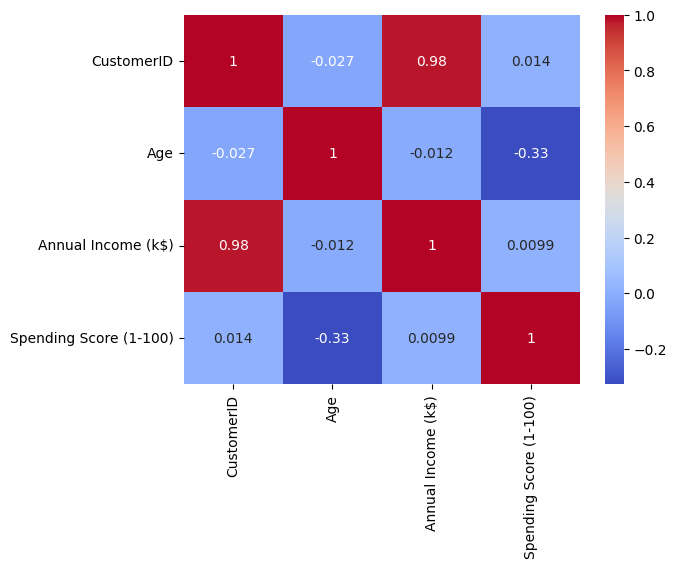

In [26]:
correlation=data.corr(numeric_only=True)
import seaborn as sns
sns.heatmap(correlation,annot=True,cmap='coolwarm')

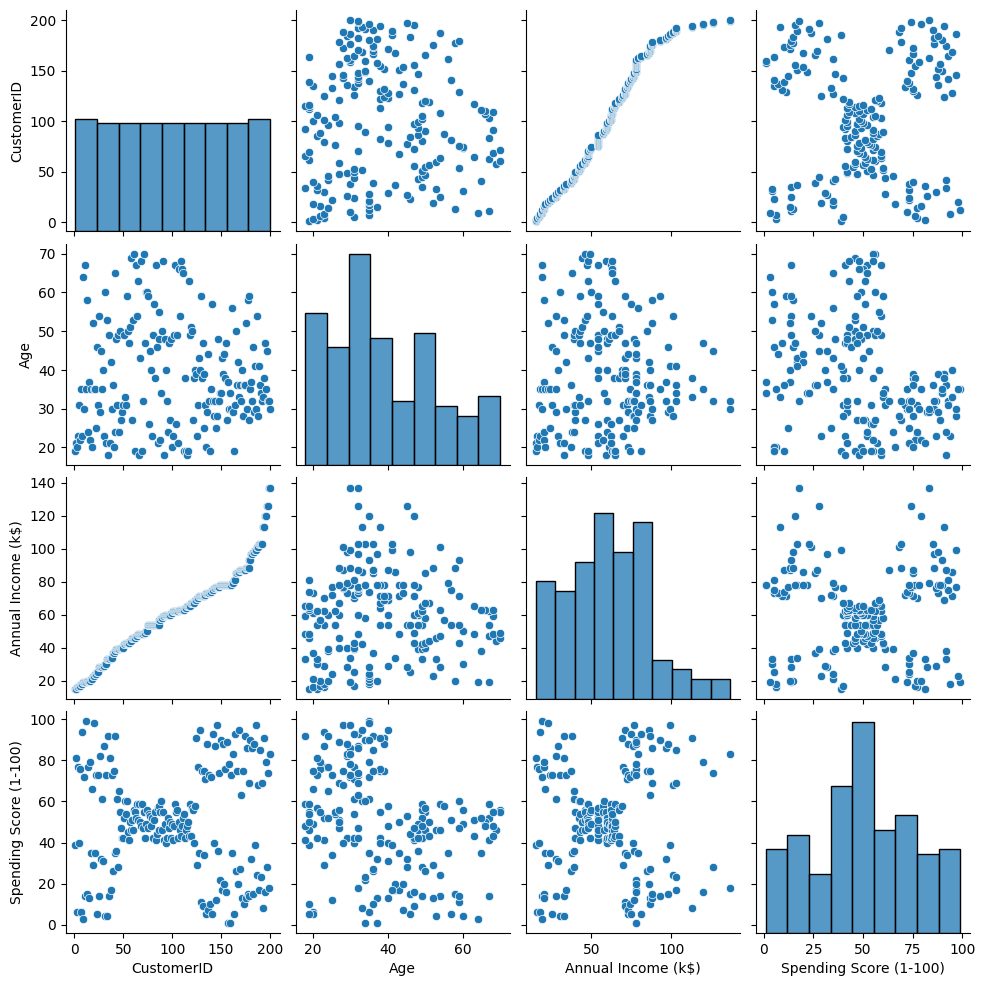

In [27]:
import matplotlib.pyplot as plt
sns.pairplot(data)

In [28]:
#feature extraction
import sklearn
X = data.iloc[:,[3,4]].values#annual_income and Spending Score (1-100)
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
#wcss claculatiom
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    #intailization
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)#init is initiallization the 5 cluster center,n_cluster just specify the number of cluster
    #we are intalizing the n_cluster in next command so in next cammand i should be between 1 to 11 
    kmeans.fit(X)#fitting the x in kmeans,The algorithm will attempt to partition the data into i clusters based on the similarity of the data points.
    wcss.append(kmeans.inertia_)
    #WCSS measures how tightly the clusters are packed together; lower values indicate better clustering.


In [30]:
#predict the model
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans
#When you perform clustering with KMeans using the fit_predict method, the algorithm internally calculates the Euclidean distance to assign each data point to the nearest cluster center
#in this the first data point is belong to the 4th cluster because it is specifyed first and same for other
#this  values are label of cluster

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

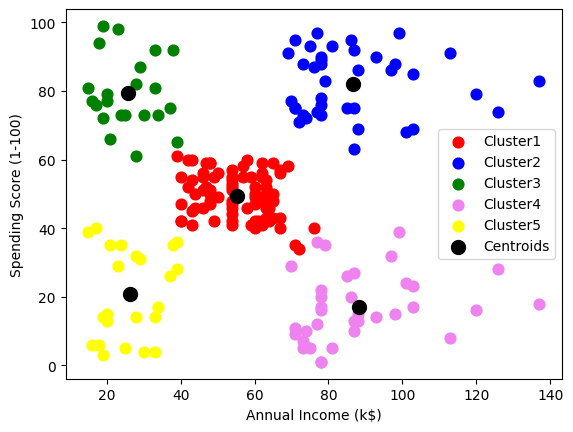

In [31]:
#s set the ponts in the scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
#X[y_kmeans == 0, 0]: Selects all data points that belong to cluster 1 (where the cluster label is 0) and retrieves their first feature (e.g., Annual Income).\
#X[y_kmeans == 0, 1]: Retrieves the second feature (e.g., Spending Score) for those points.
#select this way array([ True, False,  True, False, False,  True]) true one
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,
            c = 'black', label = 'Centroids')
#kmeans.cluster_centers_[:, 0]: Retrieves the x-coordinates (first feature) of the cluster centroids.
#kmeans.cluster_centers_[:, 1]: Retrieves the y-coordinates (second feature) of the centroids.
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.legend() 
plt.show()
#one application weak batsman and strong batsman


In [32]:
# Let’s say your dataset X looks like this:
# X = np.array([[60, 30], 
#               [80, 50], 
#               [70, 20], 
#               [90, 70], 
#               [65, 40], 
#               [75, 10]])
# And y_kmeans is:

# y_kmeans = np.array([0, 1, 0, 1, 0, 0])

# X[y_kmeans == 0]

# array([[60, 30],
#        [70, 20],
#        [65, 40],
#        [75, 10]])

# X[y_kmeans == 0, 0] 0 yields the first feature of the selected points:


# array([60, 70, 65, 75])
# X[y_kmeans == 0, 1] yields the second feature:

# array([30, 20, 40, 10])